In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
np.random.seed(3)
X, Y = datasets.make_blobs(n_samples=1000, n_features=2, center_box=(0, 10))
X = np.vstack((X[Y==0], X[Y==1]))
Y = np.hstack((Y[Y==0], Y[Y==1]))


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

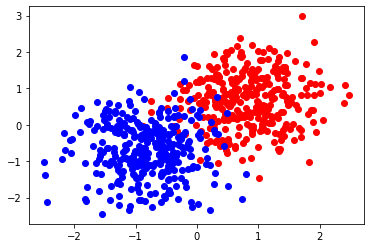

In [4]:
#Plot all data
plt.scatter(X[Y==0][:,0], X[Y==0][:,1], c="r")
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], c="b")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5)

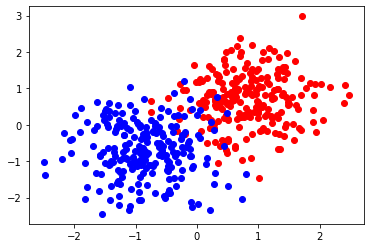

In [6]:
#Plot all training data
plt.scatter(X_train[Y_train==0][:,0], X_train[Y_train==0][:,1], c="r")
plt.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], c="b")
plt.show()

In [7]:
Y_train = Y_train.reshape(1,-1)

In [8]:
import sys
sys.path.append('../../')
import keras.keras as keras

In [9]:
#First try to achieve high variance, then use regularisation to reduce variance on same model architecture

model1 = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_size=[2]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [10]:
model1.compile(learning_rate=0.00001, loss="binary_crossentropy", optimizer="gradient_descent")

In [11]:
model1.fit(X_train.T, Y_train, X_val.T, Y_val, epochs=1000)

Training loss: 0.0948325771000746
Validation loss: 0.13505175309638473


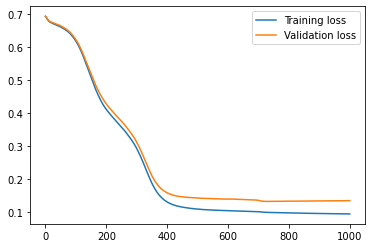

In [12]:
plt.plot(range(len(model1.history["train_loss"])), model1.history["train_loss"], label="Training loss")
plt.plot(range(len(model1.history["val_loss"])), model1.history["val_loss"], label="Validation loss")

plt.legend()

print("Training loss:", model1.history["train_loss"][-1])
print("Validation loss:", model1.history["val_loss"][-1])

plt.show()


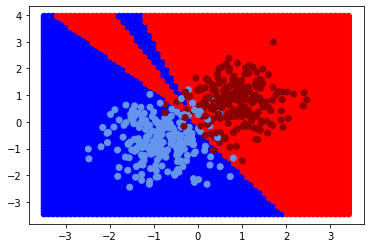

In [13]:
import matplotlib

x1 = np.arange(min(X_train[:,0])-1, max(X_train[:, 0]) +1 , 0.1)
x2 = np.arange(min(X_train[:,1])-1, max(X_train[:, 1]) +1 , 0.1)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = np.ravel(xx1)
xx2 = np.ravel(xx2)
x = np.vstack((xx1, xx2))
y = model1.predict(x)
y = np.where(y<0.5, 0, 1).reshape(-1)

colors = ["red", "blue"]

plt.scatter(xx1, xx2, c=y, cmap=matplotlib.colors.ListedColormap(colors))

colors = ["darkred", "cornflowerblue"]
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [16]:
#Now, use regularization

model2 = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_size=[2]),
    keras.layers.Dense(64, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(128, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(32, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(32, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(16, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(16, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(16, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(16, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(16, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(16, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(16, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(16, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(32, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(8, activation="relu", regularizer=("l2", 0.1)),
    keras.layers.Dense(1, activation="sigmoid", regularizer=("l2", 0.1)),
])

In [17]:
model2.compile(learning_rate=0.00005, loss="binary_crossentropy", optimizer="gradient_descent")

In [18]:
model2.fit(X_train.T, Y_train, X_val.T, Y_val, epochs=200)

Training loss: 0.18387612377084372
Validation loss: 0.22323620297063923


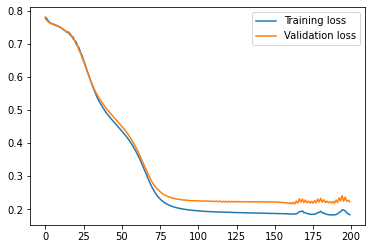

In [19]:
plt.plot(range(len(model2.history["train_loss"])), model2.history["train_loss"], label="Training loss")
plt.plot(range(len(model2.history["val_loss"])), model2.history["val_loss"], label="Validation loss")

#plt.ylim(0, 1)
plt.legend()

print("Training loss:", model2.history["train_loss"][-1])
print("Validation loss:", model2.history["val_loss"][-1])


plt.show()


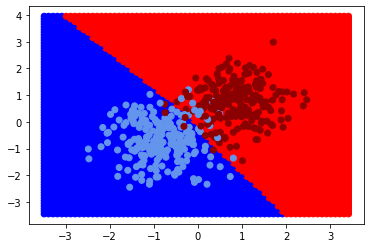

In [20]:
import matplotlib

x1 = np.arange(min(X_train[:,0])-1, max(X_train[:, 0]) +1 , 0.1)
x2 = np.arange(min(X_train[:,1])-1, max(X_train[:, 1]) +1 , 0.1)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = np.ravel(xx1)
xx2 = np.ravel(xx2)
x = np.vstack((xx1, xx2))
y = model2.predict(x)
y = np.where(y<0.5, 0, 1).reshape(-1)

colors = ["red", "blue"]

plt.scatter(xx1, xx2, c=y, cmap=matplotlib.colors.ListedColormap(colors))

colors = ["darkred", "cornflowerblue"]
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [21]:
# Now, use dropout

model3 = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_size=[2]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu", keep_prob=0.8),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu" ),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu",),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [22]:
model3.compile(learning_rate=0.00001, loss="binary_crossentropy", optimizer="gradient_descent")

In [23]:
model3.fit(X_train.T, Y_train, X_val.T, Y_val, epochs=1000)

Training loss: 0.10758691268034769
Validation loss: 0.14807039382265033


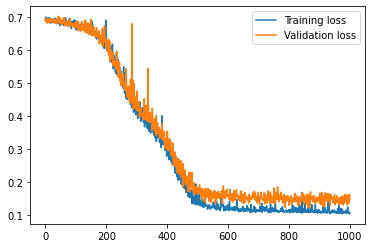

In [24]:
plt.plot(range(len(model3.history["train_loss"])), model3.history["train_loss"], label="Training loss")
plt.plot(range(len(model3.history["val_loss"])), model3.history["val_loss"], label="Validation loss")

#plt.ylim(0, 1)
plt.legend()

print("Training loss:", model3.history["train_loss"][-1])
print("Validation loss:", model3.history["val_loss"][-1])


plt.show()


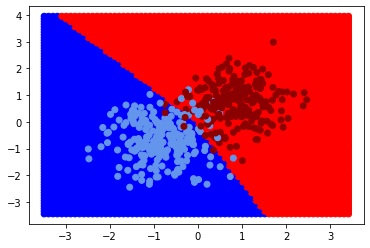

In [25]:
import matplotlib

x1 = np.arange(min(X_train[:,0])-1, max(X_train[:, 0]) +1 , 0.1)
x2 = np.arange(min(X_train[:,1])-1, max(X_train[:, 1]) +1 , 0.1)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = np.ravel(xx1)
xx2 = np.ravel(xx2)
x = np.vstack((xx1, xx2))
y = model3.predict(x)
y = np.where(y<0.5, 0, 1).reshape(-1)

colors = ["red", "blue"]

plt.scatter(xx1, xx2, c=y, cmap=matplotlib.colors.ListedColormap(colors))

colors = ["darkred", "cornflowerblue"]
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [26]:
"""
Seems like the network did not have much variance, so, adding a single dropout layer worked fine for us
"""

'\nSeems like the network did not have much variance, so, adding a single dropout layer worked fine for us\n'